## Загрузка и подготовка данных

Откроем необходимые для работы библиотеки:

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sklm
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats as st

Откроем 3 файла с данными геологоразведки:

In [2]:
try:
    data_geo1 = pd.read_csv('/datasets/geo_data_0.csv')
    data_geo2 = pd.read_csv('/datasets/geo_data_1.csv')
    data_geo3 = pd.read_csv('/datasets/geo_data_2.csv')
except ValuddeError:
    print('Неверный тип переменных')

In [3]:
data_geo1.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [4]:
data_geo2.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [5]:
data_geo3.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Проверим значения каждого региона на пропуски и на правильный тип данных:

In [6]:
list_names_region = [data_geo1, data_geo2, data_geo3]

for value in list_names_region:
    value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

Все данные имеют верный тип, в них отсутствуют пропуски. Проверим данные каждого региона на дубликаты:

In [7]:
for value in list_names_region:
    print(value.duplicated().sum())

0
0
0


В данных также отсутствуют дубликаты.

Для кадого региона создадим тепловую карту коэффициентов корреляции Пирсона и определим, насколько влияют признаки на целевой в полученных датасетах:

Первый регион:

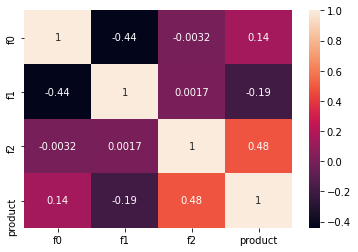

In [8]:
sns.heatmap(data_geo1.drop('id', axis = 1).corr(), annot = True);

Второй регион:

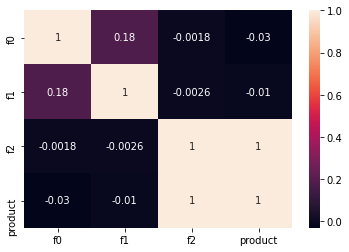

In [9]:
sns.heatmap(data_geo2.drop('id', axis = 1).corr(), annot = True);

Третий регион:

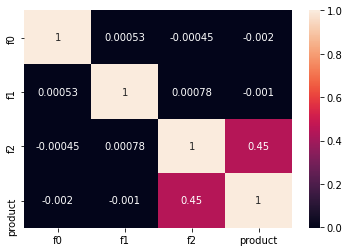

In [10]:
sns.heatmap(data_geo3.drop('id', axis = 1).corr(), annot = True);

Можем сделать следующие выводы:
1. В первом регионе прослеживается слабая зависимость между значениями f2 и целевым признаком - 0.44, а также слабая зависимость между значениями f0 и f1 - -0.44
2. В втором регионе наблюдается максимально высокая зависимость между значениями f2 и целевым признаком - 1
3. В третьем регионе прослеживается слабая зависимость между значениями f2 и целевым признаком - 0.45

Таким образом, во всех регионах зависимость целевого признака от f2 наибольшая. При расчетах наибольшее внимание необходимо уделять именно этому значению, а также второму региону, а котором корреляция равна 1.

## Обучение и проверка модели

### Разбиение данных

Разделим выборки в регионах на признаки - `target` - объем запасов в скважине, остальные данные (кроме `id`) - в `features`.

In [11]:
list_targets = []
list_features = []

for value in list_names_region:
    list_targets.append(value['product']) 
    list_features.append(value[['f0', 'f1', 'f2']])

Для каждого региона произведем разбиение данных на обучающую и валидационную выборки в соотношении 75 : 25:

In [12]:
features_train_geo1, features_valid_geo1, target_train_geo1, target_valid_geo1 = train_test_split(list_features[0], list_targets[0], test_size = 0.25, random_state = 12345)
features_train_geo2, features_valid_geo2, target_train_geo2, target_valid_geo2 = train_test_split(list_features[1], list_targets[1], test_size = 0.25, random_state = 12345)
features_train_geo3, features_valid_geo3, target_train_geo3, target_valid_geo3 = train_test_split(list_features[2], list_targets[2], test_size = 0.25, random_state = 12345)

### Обучение модели и получение предсказаний

Все данные в выборках `features` имеют численный тип данных. Приведем их у одному масштабу. Для этого создадим функцию, масштабирующую признаки тренировочной и валидационной выборок:

In [13]:
def scaling(features_train, features_valid):
    
    scaler = StandardScaler()
    numeric = ['f0', 'f1', 'f2']
    
    scaler.fit(features_train[numeric])
    pd.options.mode.chained_assignment = None
    
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
        
    return features_train, features_valid

Преобразуем выборки по регионам к одному масштабу:

In [14]:
features_train_geo1, features_valid_geo1 = scaling(features_train_geo1, features_valid_geo1)
features_train_geo2, features_valid_geo2 = scaling(features_train_geo2, features_valid_geo2)
features_train_geo3, features_valid_geo3 = scaling(features_train_geo3, features_valid_geo3)

Для данной задачи будем использовать модель линейной регрессии. Напишем функцию, создающую предсказания:

In [15]:
def model_learning(features_train, target_train, features_valid):
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    return predictions

Применим данную функцию к выборкам по трем регионам:

In [16]:
predictions_geo1 = model_learning(features_train_geo1, target_train_geo1, features_valid_geo1)
predictions_geo2 = model_learning(features_train_geo2, target_train_geo2, features_valid_geo2)
predictions_geo3 = model_learning(features_train_geo3, target_train_geo3, features_valid_geo3)
predictions_list = [predictions_geo1, predictions_geo2, predictions_geo3]

### Оценка качества модели и анализ результатов

Определим средний запас предсказанного сырья в 3 регионах:

In [17]:
print('Средний запас предсказанного сырья в первом регионе:', predictions_geo1.mean())
print('Средний запас предсказанного сырья во втором регионе:', predictions_geo2.mean())
print('Средний запас предсказанного сырья в третьем регионе:', predictions_geo3.mean())

Средний запас предсказанного сырья в первом регионе: 92.59256778438035
Средний запас предсказанного сырья во втором регионе: 68.728546895446
Средний запас предсказанного сырья в третьем регионе: 94.96504596800489


Определим значение метрик RMSE моделей по 3 регионам:

In [18]:
rmse_geo1 = sklm.mean_squared_error(target_valid_geo1, predictions_geo1) ** 0.5
rmse_geo2 = sklm.mean_squared_error(target_valid_geo2, predictions_geo2) ** 0.5
rmse_geo3 = sklm.mean_squared_error(target_valid_geo3, predictions_geo3) ** 0.5

print('RMSE модели первого региона:', rmse_geo1)
print('RMSE модели второго региона:', rmse_geo2)
print('RMSE модели третьего региона:', rmse_geo3)

RMSE модели первого региона: 37.5794217150813
RMSE модели второго региона: 0.893099286775617
RMSE модели третьего региона: 40.02970873393434


Таким образом, мы получили следующие результаты: средний предсказанный запас сырья во втором регионе примерно в 1.35 раз меньше, чем в первом и третьем. Однако метрики ошибки моделей этих регионов на несколько порядков больше, чем во втором. Т.е. разброс значений запаса во втором регионе минимален, по сравнению с первым и третьим, где значения запаса колебаются в широком диапазоне, что предварительно является плохим показателем при планировании бурения скважин в этих регионах. 

## Подготовка к расчёту прибыли

### Определение ключевых значений расчета

Определим основные параметры расчета прибыли:

Бюджет на разработку скважин в регионе:

In [19]:
price_development = 10_000_000_000

Доход с каждой тысячи баррелей сырья:

In [20]:
income_thousand_raw_material = 450_000

Количество скважин в разработку:

In [21]:
number_borehole_geo = 200

Определим средние запасы сырья по регионам (в тысячах баррелей):

In [22]:
raw_material_geo1 = data_geo1['product'].mean()
raw_material_geo2 = data_geo2['product'].mean()
raw_material_geo3 = data_geo3['product'].mean()

print(raw_material_geo1)
print(raw_material_geo2)
print(raw_material_geo3)

92.50000000000001
68.82500000000002
95.00000000000004


### Расчет достаточного объема сырья

Рассчитаем достаточный объём сырья для безубыточной разработки 1 скважины в регионе (тыс. баррелей):

In [23]:
volume_raw_material = round(price_development / (income_thousand_raw_material * number_borehole_geo), 2)
volume_raw_material

111.11

Определим среднее значение количества сырья в скважинах и достаточный объем сырья для 1 скважины:

In [24]:
print(raw_material_geo1 / volume_raw_material)
print(raw_material_geo2 / volume_raw_material)
print(raw_material_geo3 / volume_raw_material)

0.832508325083251
0.6194311943119433
0.8550085500855013


Таким образом, в среднем, запасы сырья в скважинах каждого региона составляют: 92.5, 68.825 и 95 тыс. баррелей. При этом ни в одном регионе среднее значение запаса сырья для 1 скважины не достигает минимального для безубыточной разработки - они составляют только 83.25%, 61.94% и 85.5% от минимально необходимого.

### Функция прибыли

Напишем функцию, рассчитывающую максимальную прибыль по предсказаниям модели. Для этого отсортируем данные со значениями объемов сырья по убыванию, выберем 200 лучших скважин (по условию задания), просуммируем соответствующие им целевые значения объемов сырья, умножим на доход с каждой тысячи баррелей сырья и вычтем сумму бюджета на разработку скважин в регионе:

In [25]:
def total_income(predictions, target_valid):
    
    target_valid = target_valid.reset_index(drop = True)
    predictions = pd.Series(predictions).reset_index(drop = True)
    best_predictions = predictions.sort_values(ascending = False)[:number_borehole_geo]
    income = target_valid[best_predictions.index].sum() * income_thousand_raw_material - price_development
    
    return income

Определим прибыль в каждом регионе:

In [26]:
income_geo1 = total_income(predictions_geo1, target_valid_geo1)
income_geo2 = total_income(predictions_geo2, target_valid_geo2)
income_geo3 = total_income(predictions_geo3, target_valid_geo3)
print('Прибыль в первом регионе:', income_geo1)
print('Прибыль во втором регионе:', income_geo2)
print('Прибыль в третьем регионе:', income_geo3)

Прибыль в первом регионе: 3320826043.1398506
Прибыль во втором регионе: 2415086696.681511
Прибыль в третьем регионе: 2710349963.5998325


## Расчёт прибыли и рисков 

### Распределение прибыли

Для определения распределения прибыли применим технику Bootstrap и визуализацию. Для этого создадим функцию `bootstrap_function`, нахоящую распределение прибыли по регионам. На протяжении 1000 итераций она будет белать выборку из 500 скважин, отбирать 200 и считать для них прибыль, используя функцию `total_income`:

In [27]:
def bootstrap_function(prediction, target_valid, n = 500):

    state = np.random.RandomState(12345)
    values_bootstrap = []

    for i in range(1000):
        subsample_prediction = pd.Series(prediction).reset_index(drop = True).sample(n, replace = False, random_state = state)
        subsample_target_valid = target_valid.reset_index(drop = True)[subsample_prediction.index]
        income_target_subsample = total_income(subsample_prediction, subsample_target_valid)
        values_bootstrap.append(income_target_subsample)
        
    values_bootstrap = pd.Series(values_bootstrap)
    return values_bootstrap

Применим данную функцию к 3 регионам:

In [28]:
income_predictions_geo1 = bootstrap_function(prediction = predictions_geo1, target_valid = target_valid_geo1)
income_predictions_geo2 = bootstrap_function(prediction = predictions_geo2, target_valid = target_valid_geo2)
income_predictions_geo3 = bootstrap_function(prediction = predictions_geo3, target_valid = target_valid_geo3)

Построим диаграммы распределения прибыли по 3 регионам:

Первый регион:

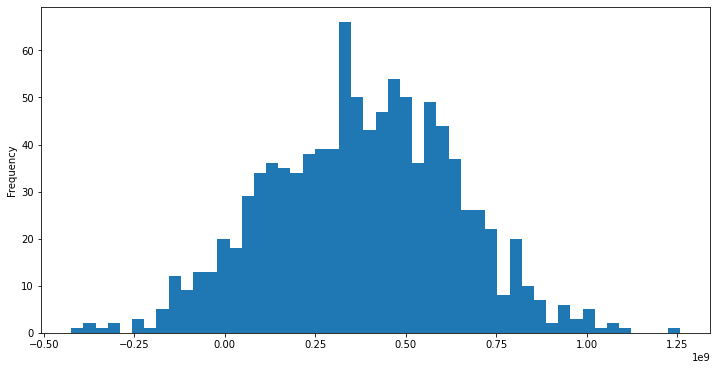

In [29]:
income_predictions_geo1.plot(kind = 'hist', bins = 50, figsize = (12, 6));

Второй регион:

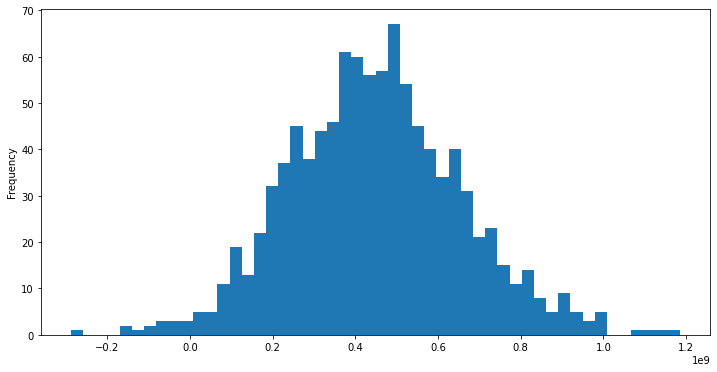

In [30]:
income_predictions_geo2.plot(kind = 'hist', bins = 50, figsize = (12, 6));

Третий регион:

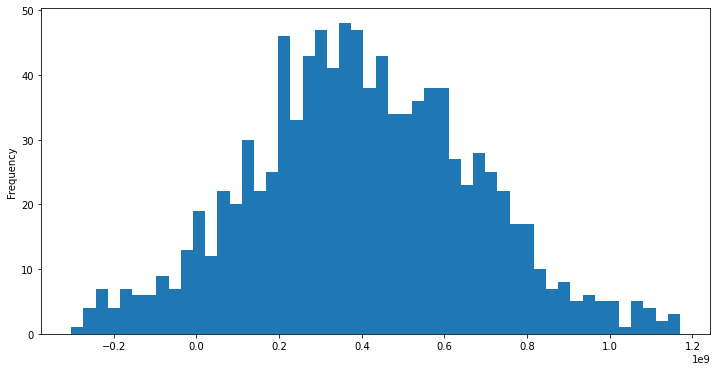

In [31]:
income_predictions_geo3.plot(kind = 'hist', bins = 50, figsize = (12, 6));

### Расчет рисков убытков

Создадим функцию, определяющую доверительный интервал, квантили, среднее, а также проверку на гипотезу: убыточек ли регион? Примем нулевую гипотезу: регион убыточен. Значение alpha примем 0.025 (по условию):

In [32]:
def confidence_interval_function(distribution):
    
    lower_distribution = distribution.quantile(0.025)
    upper_distribution = distribution.quantile(0.975)
    mean_distribution = distribution.mean()
    confidence_interval = st.t.interval(0.95, len(distribution) - 1, loc = np.mean(distribution), scale = st.sem(distribution))
    
    pvalue = distribution[distribution < 0].count() / len(distribution)

    def hypoth(pvalue, alpha = 0.025):
        
        if pvalue < alpha:
            return print('Отвергаем нулелевую гипотезу, скорее всего, регион не убыточен')
        else:
            return print('Не отвергаем нулелевую гипотезу, скорее всего, регион убыточен')
    
    return (print('Среднее значение распределения:', mean_distribution),
            print('Верхний квантиль распределения:', upper_distribution),
            print('Нижний квантиль распределения:', lower_distribution),
            print('Доверительный интервал, 95%:', confidence_interval),
            print('Вероятность убытков, %:', pvalue * 100),
            hypoth(pvalue = pvalue))

Для первого региона:

In [33]:
confidence_interval_function(income_predictions_geo1);

Среднее значение распределения: 380710890.70907485
Верхний квантиль распределения: 879613967.8477957
Нижний квантиль распределения: -126947638.03180212
Доверительный интервал, 95%: (364624702.9511889, 396797078.4669608)
Вероятность убытков, %: 7.199999999999999
Не отвергаем нулелевую гипотезу, скорее всего, регион убыточен


Для второго региона:

In [34]:
confidence_interval_function(income_predictions_geo2);

Среднее значение распределения: 448231065.1477294
Верхний квантиль распределения: 892985249.7000599
Нижний квантиль распределения: 70899384.93535462
Доверительный интервал, 95%: (435317431.6311272, 461144698.6643316)
Вероятность убытков, %: 1.4000000000000001
Отвергаем нулелевую гипотезу, скорее всего, регион не убыточен


Для третьего региона:

In [35]:
confidence_interval_function(income_predictions_geo3);

Среднее значение распределения: 402796587.171971
Верхний квантиль распределения: 963026154.4863068
Нижний квантиль распределения: -143659306.84827137
Доверительный интервал, 95%: (385890793.91037375, 419702380.4335683)
Вероятность убытков, %: 7.1
Не отвергаем нулелевую гипотезу, скорее всего, регион убыточен


Таким образом, наименее вероятно убыточным является второй регион. Помимо этого, у него наибольший показатель среднего прибыли и границ доверительного интервала. Рекомендуем его для бизнеса как наиболее выгодный.

## Выводы

В ходе выполнения исследования были произведены: обучение и проверка модели, продготовка к расчету прибыли, расчет прибыли и рисков. Были получены следующие результаты: из трех регионов подходящим является только второй - вероятность убытков меньше 2.5% (у первого - 6.9%, у третьего - 7.6%). При этом у него наибольший показатель среднего значения прибыли - 456045105.79 (у первого - 396164984.8, у третьего - 404403866.57), границ доверительного интервала - (443147248.66390055, 468942962.909421), (у первого - (379620315.15, 412709654.46), у третьего - (387445797.47, 421361935.67)), и нижнего квантиля - 33820509.39 (у первого - -111215545.89, у третьего - -163350413.39). Т.е. практически по всем метрикам второй регион - наиболее выгодный.  